# Logistic Regression 
__Solves classification problem__
## 1. Binary Classification

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("data\insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


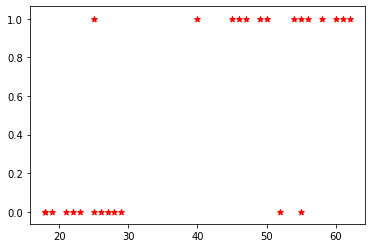

In [4]:
plt.scatter(df.age, df.bought_insurance,marker='*',color='red')

###### use train split method to split our dataset

In [7]:
# getting the shape of the dataset
df.shape

(27, 2)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.9)

In [17]:
x_train.head()

,age
26,23
17,58
22,40
20,21
6,55


In [15]:
x_test

,age
4,46
24,50
16,25


##### do the logistic regression

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
model = LogisticRegression()

In [12]:
# training the model
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
# making the prediction
model.predict(x_test) 

array([1, 1, 0], dtype=int64)

In [20]:
# checking the score
model.score(x_test,y_test)

0.6666666666666666

In [22]:
# model probability
# gives a two dimensional array of each x_test value where the first one is if the person won't buy the insurance
# where the second is the probability that the person will buy the insurance
model.predict_proba(x_test)

array([[0.37097228, 0.62902772],
       [0.23244537, 0.76755463],
       [0.95125182, 0.04874818]])

In [24]:
model.predict([[25]])

array([0], dtype=int64)

## 2.  Multiclass Classification
__Different from binary in the fact that here outcomes are more than two__.<br>
__**The problem here is to identify hand written digits*__

In [25]:
# sklearn has some predefined datasets
from sklearn.datasets import load_digits
# this dataset is made up of 1797 8x8pixel images of hand-written digit

In [26]:
# loading the training set
digits = load_digits()

In [27]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [29]:
# view the first image
digits.data[0] # image is represented in an array form

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

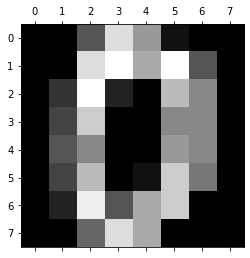

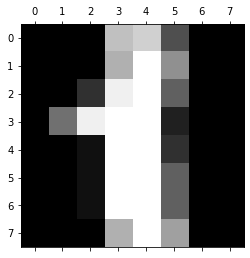

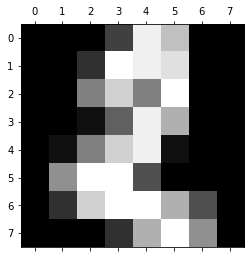

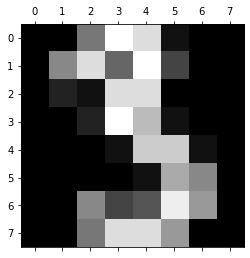

In [34]:
plt.gray()
for i in range(4):
    plt.matshow(digits.images[i]) # actual image

In [37]:
digits.target[0:15] #prints the value in the images

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4])

###### train-test split

In [39]:
from sklearn.model_selection import train_test_split

In [54]:
# digits.data is the input and digits.target is the output(target)
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)  

In [55]:
len(x_train)

1437

In [56]:
len(x_test)

360

In [57]:
# create a model instance
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [58]:
# train the model
# x_train has the hand written images and y_train has the real digits
model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
# get model accuracy
model.score(x_test,y_test)

0.9555555555555556

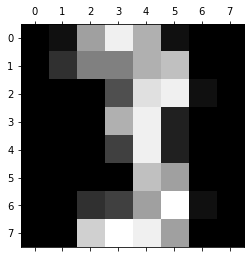

In [62]:
# pick up a random sample
plt.matshow(digits.images[59])

In [63]:
# so let's see which number it's
digits.target[59]

3

In [65]:
# so let's see what the model will predict for that image
# so here we are not using the image itself. image is binary.so we data at the index
model.predict([digits.data[59]]) 

array([3])

In [67]:
# so lets predict 0-5, form the dataset 0-5 are the same as handwritten image at index 0-5
model.predict(digits.data[0:5]) 

array([0, 1, 2, 3, 4])

In [68]:
# if we want to know where exactly my model failed we have to do confusion matrix

### confusion matrix

In [71]:
#get the predicted value first
y_predicted = model.predict(x_test)
from sklearn.metrics import confusion_matrix

#then we create the confusion matrix
cm = confusion_matrix(y_test, y_predicted)
cm 

array([[28,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  1, 32,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  1],
       [ 0,  0,  1,  1,  0, 31,  1,  0,  0,  0],
       [ 0,  1,  0,  0,  1,  1, 41,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 32,  0,  0],
       [ 0,  0,  2,  0,  1,  0,  0,  0, 32,  1],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  0, 36]], dtype=int64)

Text(69.0, 0.5, 'Truth')

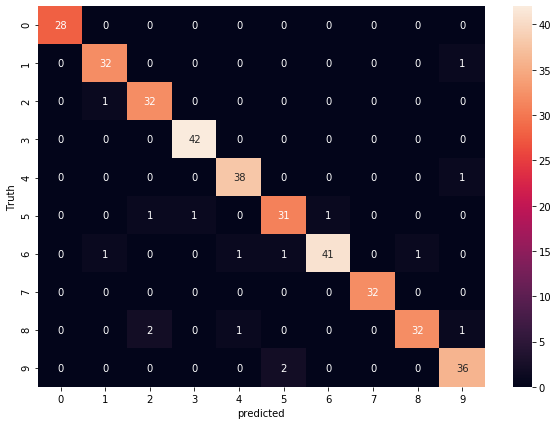

In [73]:
# let's visualize that
import seaborn as sn      # seaborn is similar to matplotlib and it's used for visualization
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [ ]:
# 37 at the top means the truth was 0 and the predicted was also 0.
# anywhere in the darker area where the value is not 0 at that point the model wasn't working correctly.
# like in second row from bottom where we have 2, that means the model predicted 8 as 2 for two times.